In [1]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import argparse
import os
import cv2
import seaborn as sns
sns.set()
import tensorflow.compat.v1 as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

DATADIR = "C:/Users/David/OneDrive/Documents/Code/REU-DataScienceProgram/su21-reu-364/project/images/asl"
CATEGORIES = ["a", "b", "c"]

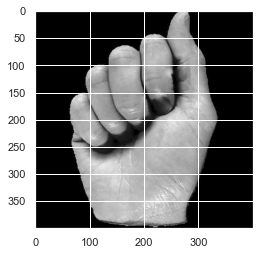

In [2]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [3]:
# Print the shape of the image
print(img_array.shape)

(400, 400)


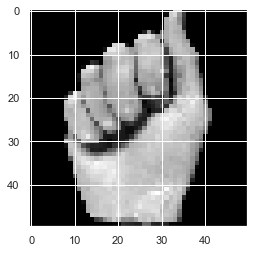

In [4]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
    return training_data

training_data = create_training_data()

288
(50, 50)


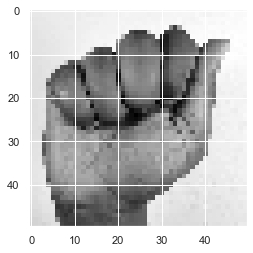

0


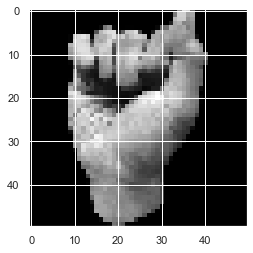

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [6]:
print(len(training_data))
print(training_data[0][0].shape)

plt.imshow(training_data[93][0], cmap = 'gray')
plt.show()

#Creating label dataset: 0, 1, and 2 means a, b, and c, respectively
label_data = []
letter = 0
for img in range(0,len(training_data),94):
    label_data.append(np.matlib.repmat(letter, 1, 94))
    letter = letter + 1
#print(label_data[1][0].shape)
print(label_data[0][0][50])
plt.imshow(training_data[69][0], cmap = 'gray')
plt.show()
labels = numpy.array(label_data).reshape((376,1))

#Convert to categorical
y = to_categorical(labels)

#labels_reshape = labels.reshape((376,1))
print(y)
#labels

In [7]:
#import random

#random.shuffle(training_data)

In [8]:
#for sample in training_data:
    #print(sample[1])

In [9]:
X_train = []
y_train = []

In [10]:
for features, label in training_data:
    X_train.append(features)
    y_train.append(label)


X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = to_categorical(np.array(y_train))



print(y_train.shape)

(288, 3)


In [11]:
# use train_test_split function to crear validation training set from train data.
# Split data into 80% train and 20% test subsets
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)

In [12]:
# Importing the required layers operation and activation function to build your model
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [13]:
# Defining basic parameters
batch_size = 32
epochs = 60
num_classes = 3

In [14]:
# Buidling your CNN model

X_train = X_train/255

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(50,50,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))

model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(num_classes, activation='softmax'))

In [15]:
# Compiling your model
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [16]:
# Verify the outpur shape for each layer and the number of trainable parameters.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 50, 50, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 25, 25, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       7

In [17]:
len(X_train)

230

[1. 0. 0.]


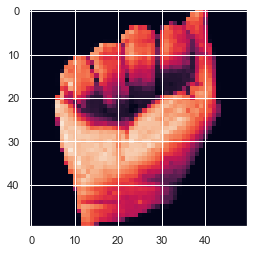

In [32]:
plt.imshow(X_train[100,:,:])
print(y_train[100])

In [19]:
# Train your model
#model.fit(X, y, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=())
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)


Epoch 1/60
8/8 [==============================] - 21s 92ms/step - loss: 0.6317 - accuracy: 0.3833
Epoch 2/60
8/8 [==============================] - 1s 98ms/step - loss: 0.4767 - accuracy: 0.5936
Epoch 3/60
8/8 [==============================] - 1s 99ms/step - loss: 0.2094 - accuracy: 0.8659
Epoch 4/60
8/8 [==============================] - 1s 101ms/step - loss: 0.1462 - accuracy: 0.9288
Epoch 5/60
8/8 [==============================] - 1s 96ms/step - loss: 0.1014 - accuracy: 0.9484
Epoch 6/60
8/8 [==============================] - 1s 92ms/step - loss: 0.0851 - accuracy: 0.9247
Epoch 7/60
8/8 [==============================] - 1s 92ms/step - loss: 0.0358 - accuracy: 0.9773
Epoch 8/60
8/8 [==============================] - 1s 92ms/step - loss: 0.0149 - accuracy: 0.9964
Epoch 9/60
8/8 [==============================] - 1s 92ms/step - loss: 0.0114 - accuracy: 0.9912
Epoch 10/60
8/8 [==============================] - 1s 88ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 11/60
8/8 [==========

In [20]:
# Evaluating the performance of the model usign the validation data
test_eval = model.evaluate(X_validation, y_validation, verbose=1)
print("The loss of the model is {0:f}, and the accurracy is {1:f}".format(test_eval[0],test_eval[1]))

2/2 [==============================] - 1s 25ms/step - loss: 0.0000e+00 - accuracy: 1.0000
The loss of the model is 0.000000, and the accurracy is 1.000000


In [21]:
# using fashion_trained_history information to provide the performance of the model during the training stage
accuracy = history.history['accuracy']
#val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']
epochs = range(len(accuracy))

In [22]:
# Predicting the new data "test_X, y_test"
predicted = model.predict(X_validation)

# taking the max argument
predicted = np.argmax(np.round(predicted),axis=1)
print(predicted.shape)
print(np.argmax(y_validation))
#print("size fo predicted array {0:d}x{1:d} and size of y_test array {2:d}".format(predicted.shape[0],predicted.shape[1],y_test.shape))

(58,)
1


In [23]:
#Printing Classification reports


#print(y_validation)
#print(np.argmax(y_validation, axis=1))
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(np.argmax(y_validation, axis=1), predicted, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        18
     Class 1       1.00      1.00      1.00        14
     Class 2       1.00      1.00      1.00        26

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



In [26]:
# Now let's select those samples that were correctly classified.
correct = np.where(predicted==y_validation)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_validation[correct].reshape(50,50,1), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted[correct], y_validation[correct]))
    plt.tight_layout()

Found 0 correct labels


<ipython-input-26-b173e373d5ab>:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  correct = np.where(predicted==y_validation)[0]


Found 1 incorrect labels


<ipython-input-27-c3a09c969302>:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  incorrect = np.where(predicted!=y_validation)[0]


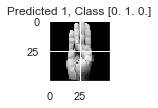

In [27]:
# Now let's select those samples that were incorrectly classified.
incorrect = np.where(predicted!=y_validation)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_validation[incorrect].reshape(50,50,1), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted[incorrect], y_validation[incorrect]))
    plt.tight_layout()

In [24]:
print(target_names)

['Class 0', 'Class 1', 'Class 2']


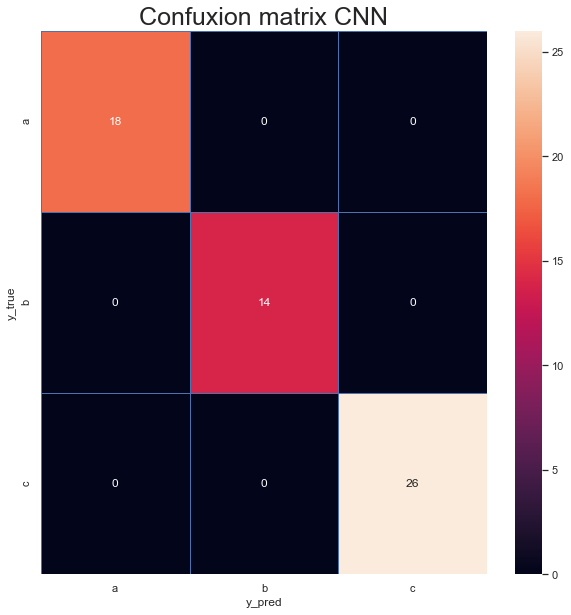

(58,)


In [25]:
from sklearn.metrics import confusion_matrix

labels=['a','b','c']
y_classes = np.array([np.argmax(y, axis=None, out=None) for y in y_validation])
cm=confusion_matrix(y_classes,predicted)
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="b",fmt=".0f",ax=ax)
plt.title("Confuxion matrix CNN", size = 25)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show()
print(y_classes.shape)